<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Analisi di serie temporali**:

Per aiutarti negli esercizi che seguiranno, ricorda:

**Stagionalità**: tendenza di una variabile a ripetere periodicamente il proprio comportamento si chiama stagionalità.

La stagionalità (annuale) è semplice con l'energia solare: ogni anno osserviamo lo stesso comportamento, dovuto alla disponibilità di luce solare.

La stagionalità non è necessariamente meterologica: pensate ai saldi durante le festività natalizie.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Utilizzando i dataset denominati *OPSD_Germany_all* e *OPSD_Germany_consumption*, svolgi i seguenti esercizi:

- Esercizio 1

    Usa gli strumenti che abbiamo visto finora per tracciare il consumo di energia elettrica.

    Prendi spunto da questo domanda:
    Che tipo di **stagionalità** possiamo osservare su questa variabile? 
    

- Esercizio 2

    Analizza la stagionalità settimanale del consumo di energia elettrica utilizzando le funzioni groupby (Pandas) ed eventualmente aiutati creando boxplot con Seaborn.
    

- Esercizio 3

    Confronta (all'interno di un singolo grafico) la serie mensile di:
    - consumo di energia elettrica 
    - produzione di energia rinnovabile (solare, eolica e la somma delle due).
    
  Tracciare la serie annuale del rapporto tra
    - produzione di energia rinnovabile
    - consumo di energia elettrica
    
**[Facoltativo] Esercizio 4**

Traccia la produzione settimanale di energia solare durante il 2017/01-07 utilizzando **resample** e **rolling** come funzioni. Confronta i risultati grafici.

**Esercizio 1**

Usa gli strumenti che abbiamo visto finora per tracciare il consumo di energia elettrica.

Prendi spunto da questo domanda: Che tipo di stagionalità possiamo osservare su questa variabile?

In [1]:
import seaborn as sns
import pandas as pd


In [2]:
sns.set()

In [3]:
df = pd.read_csv('OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')
df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D9E17DE80>,
      dtype=object)

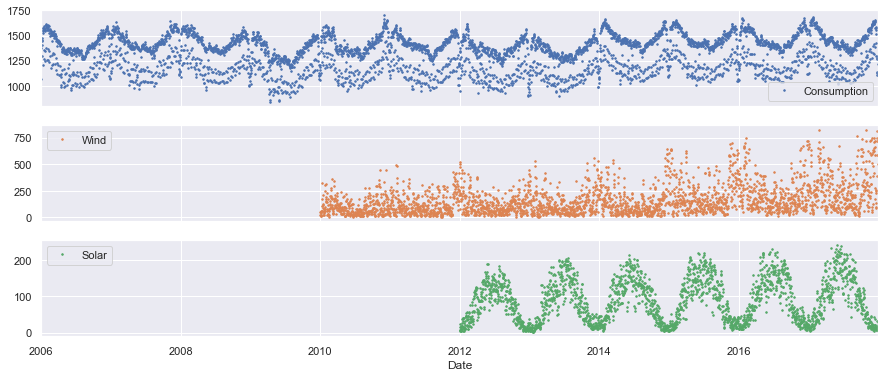

In [4]:
subplots = df.plot(figsize=(15, 6),
                   marker='.',
                   markersize=3,
                   linestyle='',
                   subplots=True)

subplots

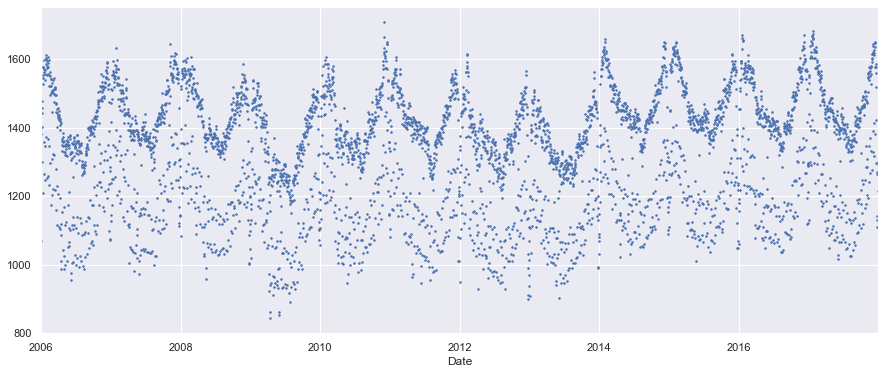

In [5]:
df['Consumption'].plot(figsize=(15, 6),
                       marker='.',
                       markersize=3,
                       linestyle='')

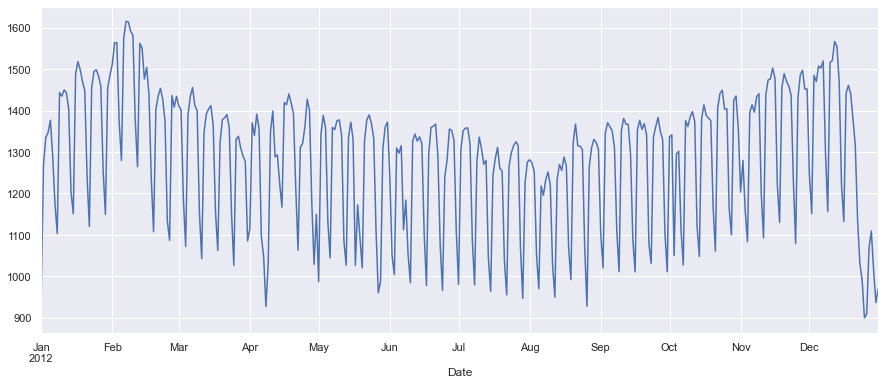

In [6]:
df['Consumption']['2012'].plot(figsize=(15, 6), linestyle='-')

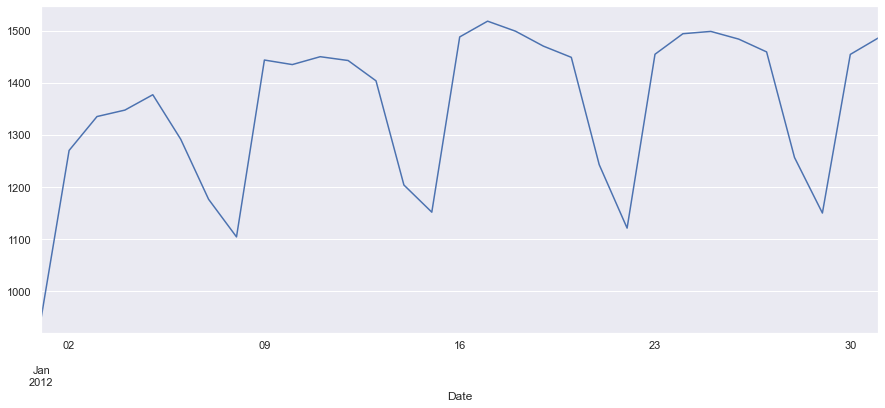

In [7]:
df['Consumption']['2012-01'].plot(figsize=(15, 6), linestyle='-')

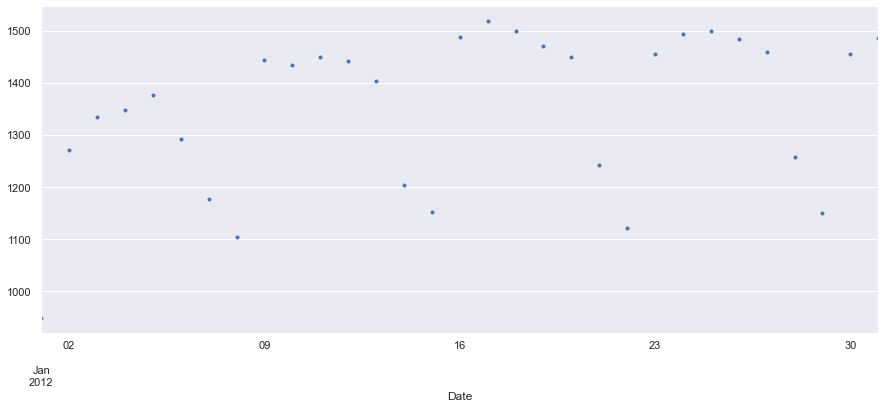

In [8]:
df['Consumption']['2012-01'].plot(figsize=(15, 6),
                                  marker='.',
                                  linestyle='')

**Esercizio 2**

Analizza la stagionalità settimanale del consumo di energia elettrica utilizzando le funzioni groupby (Pandas) ed eventualmente aiutati creando boxplot con Seaborn.

In [9]:
import matplotlib.pyplot as plt

In [10]:
df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


In [11]:
df['Weekday'] = df.index.day_name()

df.head()

,Consumption,Wind,Solar,Weekday
Date,,,,
2006-01-01,1069.184,NaN,NaN,Sunday
2006-01-02,1380.521,NaN,NaN,Monday
2006-01-03,1442.533,NaN,NaN,Tuesday
2006-01-04,1457.217,NaN,NaN,Wednesday
2006-01-05,1477.131,NaN,NaN,Thursday


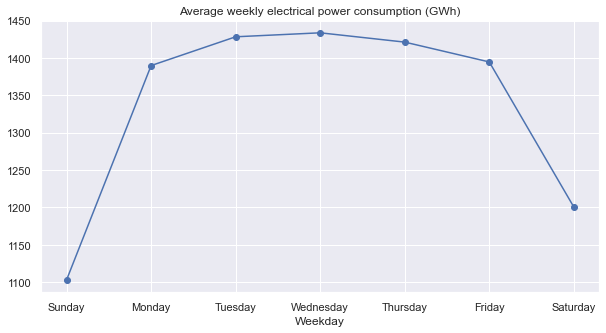

In [12]:
df.groupby('Weekday', sort=False)['Consumption'].mean().plot(figsize=(10,5),
                                                             marker='o',
                                                             title='Average weekly electrical power consumption (GWh)')

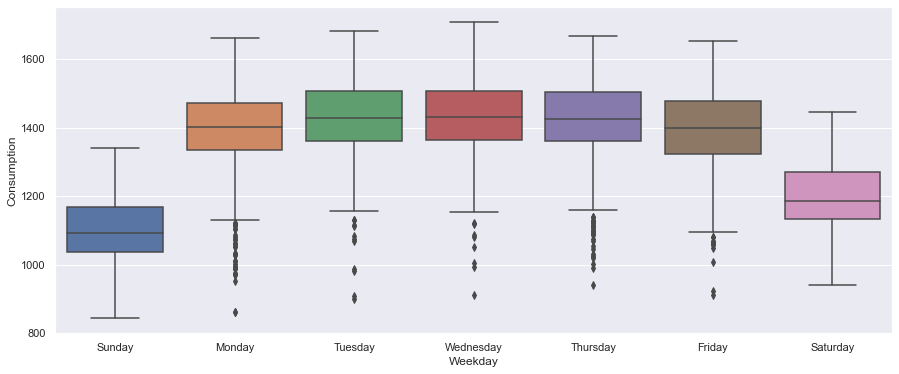

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Weekday',
            y='Consumption',
            data=df)

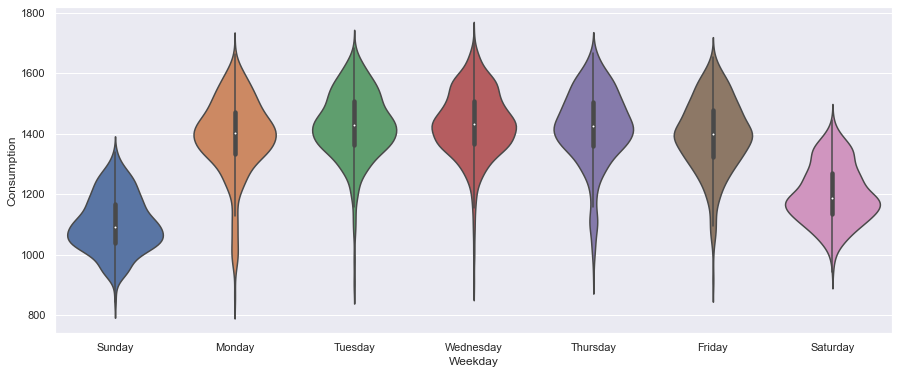

In [14]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Weekday',
               y='Consumption',
               data=df)


**Esercizio 3**

Confronta (all'interno di un singolo grafico) la serie mensile di:

- consumo di energia elettrica
- produzione di energia rinnovabile (solare, eolica e la somma delle due). 

Tracciare la serie annuale del rapporto tra
- produzione di energia rinnovabile
- consumo di energia elettrica

In [15]:
df

,Consumption,Wind,Solar,Weekday
Date,,,,
2006-01-01,1069.18400,NaN,NaN,Sunday
2006-01-02,1380.52100,NaN,NaN,Monday
2006-01-03,1442.53300,NaN,NaN,Tuesday
2006-01-04,1457.21700,NaN,NaN,Wednesday
2006-01-05,1477.13100,NaN,NaN,Thursday
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,Wednesday
2017-12-28,1299.86398,506.424,14.162,Thursday
2017-12-29,1295.08753,584.277,29.854,Friday


In [16]:
df.fillna(0)

df['Renewable'] = df['Solar'] + df['Wind']

df.head()

,Consumption,Wind,Solar,Weekday,Renewable
Date,,,,,
2006-01-01,1069.184,NaN,NaN,Sunday,NaN
2006-01-02,1380.521,NaN,NaN,Monday,NaN
2006-01-03,1442.533,NaN,NaN,Tuesday,NaN
2006-01-04,1457.217,NaN,NaN,Wednesday,NaN
2006-01-05,1477.131,NaN,NaN,Thursday,NaN


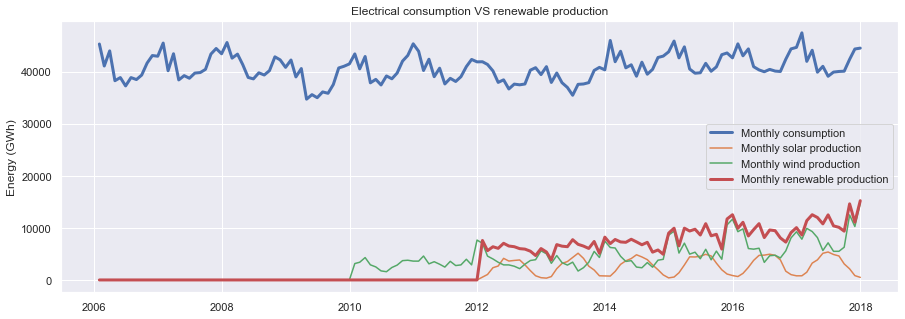

In [17]:
plt.figure(figsize=(15,5))

plt.plot(df['Consumption'].resample('M').sum(),
         linewidth=3,
         label='Monthly consumption')

plt.plot(df['Solar'].resample('M').sum(),
         label='Monthly solar production')

plt.plot(df['Wind'].resample('M').sum(),
         label='Monthly wind production')

plt.plot(df['Renewable'].resample('M').sum(),
         linewidth=3,
         label='Monthly renewable production')

plt.ylabel('Energy (GWh)')
plt.title('Electrical consumption VS renewable production')
plt.legend()

In [18]:
df_yearly_sum = df.resample('Y').sum()

df_yearly_sum

,Consumption,Wind,Solar,Renewable
Date,,,,
2006-12-31,489068.53600,0.000,0.000,0.000
2007-12-31,496631.84700,0.000,0.000,0.000
2008-12-31,495570.87600,0.000,0.000,0.000
2009-12-31,459737.42800,0.000,0.000,0.000
2010-12-31,488588.70000,35911.777,0.000,0.000
2011-12-31,484814.08600,44032.951,0.000,0.000
2012-12-31,469574.75400,45862.667,27887.332,73749.999
2013-12-31,463336.85300,47197.832,29559.780,76697.443
2014-12-31,504164.82100,51107.672,32498.307,83370.502


In [19]:
df.loc['2006'].sum()

Consumption                                           489068.536
Wind                                                         0.0
Solar                                                        0.0
Weekday        SundayMondayTuesdayWednesdayThursdayFridaySatu...
Renewable                                                    0.0
dtype: object

In [20]:
df_yearly_sum['Renewable/Consumption'] = df_yearly_sum['Renewable'] / df_yearly_sum['Consumption']
df_yearly_sum

,Consumption,Wind,Solar,Renewable,Renewable/Consumption
Date,,,,,
2006-12-31,489068.53600,0.000,0.000,0.000,0.000000
2007-12-31,496631.84700,0.000,0.000,0.000,0.000000
2008-12-31,495570.87600,0.000,0.000,0.000,0.000000
2009-12-31,459737.42800,0.000,0.000,0.000,0.000000
2010-12-31,488588.70000,35911.777,0.000,0.000,0.000000
2011-12-31,484814.08600,44032.951,0.000,0.000,0.000000
2012-12-31,469574.75400,45862.667,27887.332,73749.999,0.157057
2013-12-31,463336.85300,47197.832,29559.780,76697.443,0.165533
2014-12-31,504164.82100,51107.672,32498.307,83370.502,0.165364


In [21]:
df_yearly_sum['Renewable/Consumption'] = (df_yearly_sum['Renewable/Consumption']*100).round(1)
df_yearly_sum

,Consumption,Wind,Solar,Renewable,Renewable/Consumption
Date,,,,,
2006-12-31,489068.53600,0.000,0.000,0.000,0.0
2007-12-31,496631.84700,0.000,0.000,0.000,0.0
2008-12-31,495570.87600,0.000,0.000,0.000,0.0
2009-12-31,459737.42800,0.000,0.000,0.000,0.0
2010-12-31,488588.70000,35911.777,0.000,0.000,0.0
2011-12-31,484814.08600,44032.951,0.000,0.000,0.0
2012-12-31,469574.75400,45862.667,27887.332,73749.999,15.7
2013-12-31,463336.85300,47197.832,29559.780,76697.443,16.6
2014-12-31,504164.82100,51107.672,32498.307,83370.502,16.5


Text(0, 0.5, 'Energy (GWh)')

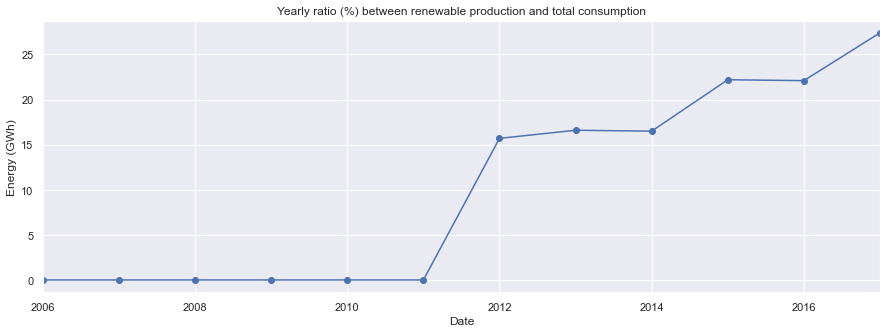

In [22]:
df_yearly_sum['Renewable/Consumption'].plot(figsize=(15, 5),
                                            marker='o',
                                            title='Yearly ratio (%) between renewable production and total consumption')
plt.ylabel('Energy (GWh)')

**[Facoltativo] Esercizio 4**

Traccia la produzione settimanale di energia solare durante il 2017/01-07 utilizzando **resample** e **rolling** come funzioni. Confronta i risultati grafici.

In [23]:
plt.rcParams['figure.figsize'] = (15,5)

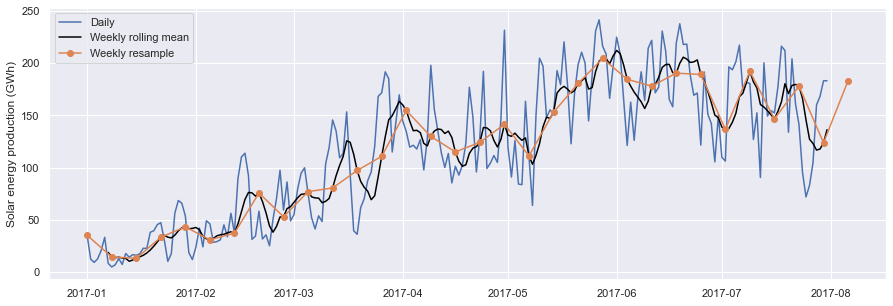

In [24]:
plt.plot(df['Solar']['2017-01':'2017-07'],
         label='Daily')

plt.plot(df['Solar']['2017-01':'2017-07'].rolling(7).mean(),
         label='Weekly rolling mean',
         color='black')

plt.plot(df['Solar']['2017-01':'2017-07'].resample('W').mean(),
         marker='o',
         label='Weekly resample')

plt.ylabel('Solar energy production (GWh)')
plt.legend()